# **Mounting Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Import some Library Function**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# **Import the dataset**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Earthquake Prediction/Earthquake Data.csv')

In [4]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [5]:
df.shape

(23412, 21)

In [6]:
df = df.drop(['Depth Error'], axis = 1)
df

,Date,Time,Latitude,Longitude,Type,Depth,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,6.0,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,6.2,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,40.0,5.6,ML,0.320,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,33.0,5.5,ML,0.260,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,NaN,5.9,MWW,NaN,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,NaN,6.3,MWW,NaN,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed


In [7]:
df = df.drop(['Depth Seismic Stations'], axis = 1)
df

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,6.0,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,6.2,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,5.6,ML,0.320,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,5.5,ML,0.260,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,5.9,MWW,NaN,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,6.3,MWW,NaN,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed


In [8]:
df = df.drop(['Magnitude Error'], axis = 1)
df

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,6.0,MW,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,5.8,MW,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,6.2,MW,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,5.8,MW,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,5.8,MW,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,5.6,ML,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,5.5,ML,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,5.9,MWW,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,6.3,MWW,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed


In [9]:
df = df.drop(['Magnitude Seismic Stations'], axis = 1)
df

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,6.0,MW,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,5.8,MW,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,6.2,MW,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,5.8,MW,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,5.8,MW,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,5.6,ML,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,5.5,ML,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,5.9,MWW,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,6.3,MWW,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed


In [10]:
df = df.drop(['ID'], axis = 1)
df

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,6.0,MW,NaN,NaN,NaN,NaN,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,5.8,MW,NaN,NaN,NaN,NaN,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,6.2,MW,NaN,NaN,NaN,NaN,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,5.8,MW,NaN,NaN,NaN,NaN,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,5.8,MW,NaN,NaN,NaN,NaN,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,5.6,ML,42.47,0.120,NaN,0.1898,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,5.5,ML,48.58,0.129,NaN,0.2187,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,5.9,MWW,91.00,0.992,4.8,1.5200,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,6.3,MWW,26.00,3.553,6.0,1.4300,US,US,US,Reviewed


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 23412 non-null  object 
 1   Time                 23412 non-null  object 
 2   Latitude             23412 non-null  float64
 3   Longitude            23412 non-null  float64
 4   Type                 23412 non-null  object 
 5   Depth                23412 non-null  float64
 6   Magnitude            23412 non-null  float64
 7   Magnitude Type       23409 non-null  object 
 8   Azimuthal Gap        7299 non-null   float64
 9   Horizontal Distance  1604 non-null   float64
 10  Horizontal Error     1156 non-null   float64
 11  Root Mean Square     17352 non-null  float64
 12  Source               23412 non-null  object 
 13  Location Source      23412 non-null  object 
 14  Magnitude Source     23412 non-null  object 
 15  Status               23412 non-null 

In [12]:
# Checking for Missing values
df.isnull().sum()

Date                       0
Time                       0
Latitude                   0
Longitude                  0
Type                       0
Depth                      0
Magnitude                  0
Magnitude Type             3
Azimuthal Gap          16113
Horizontal Distance    21808
Horizontal Error       22256
Root Mean Square        6060
Source                     0
Location Source            0
Magnitude Source           0
Status                     0
dtype: int64

In [13]:
def preprocess_input(df):
    # filling missing values by substituting mean value in rms columns 
    df['Root Mean Square'] = df['Root Mean Square'].fillna(df['Root Mean Square'].mean())
    # filling missing values by substituting mode in Magnitude type columns 
    df['Magnitude Type'] = df['Magnitude Type'].fillna(df['Magnitude Type'].mode()[0])
    df.reset_index(drop=True,inplace=True)
    # converting Date into pandas datetime 
    df['Date'] = pd.to_datetime(df['Date'],utc=True)
    # converting Time into pandas datetime 
    df['Time'] = pd.to_datetime(df['Time'],utc=True)
    # Extracting Year and Month From Date column and converting it into integer
    df['Year'] = df['Date'].apply(lambda x: str(x)[0:4]).astype(np.int)
    df['Month'] = df['Date'].apply(lambda x: str(x)[5:7]).astype(np.int)
    # Extracting Hour From Time column and converting it into integer
    df['Hour'] = df['Time'].apply(lambda x: str(x)[11:13]).astype(np.int)
    
    # dropping Date and Time as we dont need it anymore.
    df.drop(['Date','Time'], axis=1,inplace=True)
    
    # encoding Status to make it numerical.
    df['Status'] = df['Status'].map({'Automatic':0,
                                    'Reviewed':1}).astype('int')
    
    return df

In [14]:
    df = df.copy()
    # checking for features in which greater than 66%(2/3) of data is missing
    null_columns = df.loc[:, df.isna().sum() > 0.66 * df.shape[0]].columns
    # dropping those columns 
    df.drop(null_columns, axis=1,inplace=True)

In [15]:
    # converting Date into pandas datetime 
    df['Date'] = pd.to_datetime(df['Date'],utc=True)
    # converting Time into pandas datetime 
    df['Time'] = pd.to_datetime(df['Time'],utc=True)
    # Extracting Year and Month From Date column and converting it into integer
    df['Year'] = df['Date'].apply(lambda x: str(x)[0:4]).astype(np.int)
    df['Month'] = df['Date'].apply(lambda x: str(x)[5:7]).astype(np.int)
    # Extracting Hour From Time column and converting it into integer
    df['Hour'] = df['Time'].apply(lambda x: str(x)[11:13]).astype(np.int)

<ipython-input-15-37fe3ba55e22>:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df['Year'] = df['Date'].apply(lambda x: str(x)[0:4]).astype(np.int)
<ipython-input-15-37fe3ba55e22>:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information

In [16]:
df

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,Source,Location Source,Magnitude Source,Status,Year,Month,Hour
0,1965-01-02 00:00:00+00:00,2023-01-15 13:44:18+00:00,19.2460,145.6160,Earthquake,131.60,6.0,MW,NaN,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,1,13
1,1965-01-04 00:00:00+00:00,2023-01-15 11:29:49+00:00,1.8630,127.3520,Earthquake,80.00,5.8,MW,NaN,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,1,11
2,1965-01-05 00:00:00+00:00,2023-01-15 18:05:58+00:00,-20.5790,-173.9720,Earthquake,20.00,6.2,MW,NaN,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,1,18
3,1965-01-08 00:00:00+00:00,2023-01-15 18:49:43+00:00,-59.0760,-23.5570,Earthquake,15.00,5.8,MW,NaN,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,1,18
4,1965-01-09 00:00:00+00:00,2023-01-15 13:32:50+00:00,11.9380,126.4270,Earthquake,15.00,5.8,MW,NaN,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,1,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,2016-12-28 00:00:00+00:00,2023-01-15 08:22:12+00:00,38.3917,-118.8941,Earthquake,12.30,5.6,ML,0.1898,NN,NN,NN,Reviewed,2016,12,8
23408,2016-12-28 00:00:00+00:00,2023-01-15 09:13:47+00:00,38.3777,-118.8957,Earthquake,8.80,5.5,ML,0.2187,NN,NN,NN,Reviewed,2016,12,9
23409,2016-12-28 00:00:00+00:00,2023-01-15 12:38:51+00:00,36.9179,140.4262,Earthquake,10.00,5.9,MWW,1.5200,US,US,US,Reviewed,2016,12,12
23410,2016-12-29 00:00:00+00:00,2023-01-15 22:30:19+00:00,-9.0283,118.6639,Earthquake,79.00,6.3,MWW,1.4300,US,US,US,Reviewed,2016,12,22


In [17]:
df = preprocess_input(df)

<ipython-input-13-2af82065414e>:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df['Year'] = df['Date'].apply(lambda x: str(x)[0:4]).astype(np.int)
<ipython-input-13-2af82065414e>:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informati

# **Now Checking the missing value again after filling the null value with mean value**

In [18]:
# checking missing values again.
df.isnull().sum()

Latitude            0
Longitude           0
Type                0
Depth               0
Magnitude           0
Magnitude Type      0
Root Mean Square    0
Source              0
Location Source     0
Magnitude Source    0
Status              0
Year                0
Month               0
Hour                0
dtype: int64

# **Dataset ke 2 ta catagory te vag kora hoyese. Karon amra aksathe object abong numerical value ke hot encoding preprocess korte parbo na.**

In [19]:
# creating list of categorical columns
categorical_columns = [col for col in df.columns if df.dtypes[col] == 'object']

# creating list of numerical columns 
numerical_columns = [col for col in df.columns if ((df.dtypes[col] != 'object') & (col != 'Status'))]

print('Numerical Features are : ',numerical_columns)
print('Categorical Features are : ',categorical_columns)

Numerical Features are :  ['Latitude', 'Longitude', 'Depth', 'Magnitude', 'Root Mean Square', 'Year', 'Month', 'Hour']
Categorical Features are :  ['Type', 'Magnitude Type', 'Source', 'Location Source', 'Magnitude Source']


# ***Now catagory wise dataset ke preprocessing korbo***

In [20]:
def onehot_encoder(df, cols):
    df = df.copy()
    for col in cols:
        dummies = pd.get_dummies(df[col], drop_first=True)
        df = pd.concat([df, dummies], axis=1)
        df.drop(col, axis=1,inplace=True)
    return df

In [21]:
df = onehot_encoder(df,categorical_columns)

# **Standard scaler use korbo for numeric column preprocess**

In [22]:
sc = StandardScaler()
df[numerical_columns] = sc.fit_transform(df[numerical_columns])

In [23]:
df.head()

,Latitude,Longitude,Depth,Magnitude,Root Mean Square,Status,Year,Month,Hour,Explosion,...,NN,OFFICIAL,PAR,PGC,PR,SE,US,US_GCMT,US_PGC,UW
0,0.583377,0.844368,0.495984,0.277668,1.367985e-15,0,-1.915487,-1.603109,0.225244,0,...,0,0,0,0,0,0,0,0,0,0
1,0.006109,0.698849,0.075272,-0.195082,1.367985e-15,0,-1.915487,-1.603109,-0.064982,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.739162,-1.701962,-0.413928,0.750418,1.367985e-15,0,-1.915487,-1.603109,0.950811,0,...,0,0,0,0,0,0,0,0,0,0
3,-2.017599,-0.503524,-0.454694,-0.195082,1.367985e-15,0,-1.915487,-1.603109,0.950811,0,...,0,0,0,0,0,0,0,0,0,0
4,0.340688,0.691479,-0.454694,-0.195082,1.367985e-15,0,-1.915487,-1.603109,0.225244,0,...,0,0,0,0,0,0,0,0,0,0


# **Dataset ke split korbo train and testing er jonno. Amra train er jonno 85% data use korbo total dataset er and testing er jonno 15% dataset use korbo.**

In [24]:
X = df.drop('Status',axis=1)
y = df['Status']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50)

# **Akta sequential model build korbo, Machine learning algorithm gula use korar jonno**

In [26]:
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

In [27]:
#The following is the model summary of the model, There is no non-trainable parameters in the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                3296      
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,473
Trainable params: 5,473
Non-trainable params: 0
_________________________________________________________________


# **amra model er weight ber korbo, porobortite ei model er weight diye je kono web application, predictive model banano jabe.**

In [28]:
# Early Stopping
monitor = EarlyStopping(monitor='val_auc', patience=5, 
                        verbose=1, mode='max',restore_best_weights=True)
# Defining Callbacks

filepath = './best_weights.hdf5'
checkpoint    = ModelCheckpoint(filepath, 
                                monitor = 'val_auc', 
                                mode='max', 
                                save_best_only=True, 
                                verbose = 1)

reduceLR = ReduceLROnPlateau()
callback_list = [monitor, checkpoint,reduceLR]

# model compile
model.compile(
    optimizer=Adam(lr=0.001),
    loss='binary_crossentropy',
    metrics=[tf.keras.metrics.AUC(name='auc')]
)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


#**Model ke fit korano holo. Dataset ke split korsi train ar test er jonno.** 
#**validation er jonno 20% data use korbo.**

#**batch size 8 means, model ti every epoch e koyta kore data ke train korbe eta. Eta apni joto issa dite parben. Tobe 16 is the standard size.**

#**epoch = 10 mane holo dataset ti ke total 10 bar model er madhome train korano holo.**

In [29]:
history = model.fit(
    X_train,
    y_train,
    validation_split=0.10,
    batch_size=16,
    epochs=10,
    callbacks=callback_list,
    verbose=1
)

Epoch 1/10
1048/1054 [============================>.] - ETA: 0s - loss: 0.0330 - auc: 0.9988
Epoch 1: val_auc improved from -inf to 1.00000, saving model to ./best_weights.hdf5
1054/1054 [==============================] - 11s 7ms/step - loss: 0.0328 - auc: 0.9988 - val_loss: 2.4987e-04 - val_auc: 1.0000 - lr: 0.0010
Epoch 2/10
1051/1054 [============================>.] - ETA: 0s - loss: 1.2164e-04 - auc: 1.0000
Epoch 2: val_auc did not improve from 1.00000
1054/1054 [==============================] - 7s 7ms/step - loss: 1.2141e-04 - auc: 1.0000 - val_loss: 4.4510e-05 - val_auc: 1.0000 - lr: 0.0010
Epoch 3/10
1049/1054 [============================>.] - ETA: 0s - loss: 2.6707e-05 - auc: 1.0000
Epoch 3: val_auc did not improve from 1.00000
1054/1054 [==============================] - 5s 5ms/step - loss: 2.6625e-05 - auc: 1.0000 - val_loss: 1.4890e-05 - val_auc: 1.0000 - lr: 0.0010
Epoch 4/10
1050/1054 [============================>.] - ETA: 0s - loss: 1.0798e-05 - auc: 1.0000
Epoch 4: va

# **Accuracy Plotting Validation Accuracy**

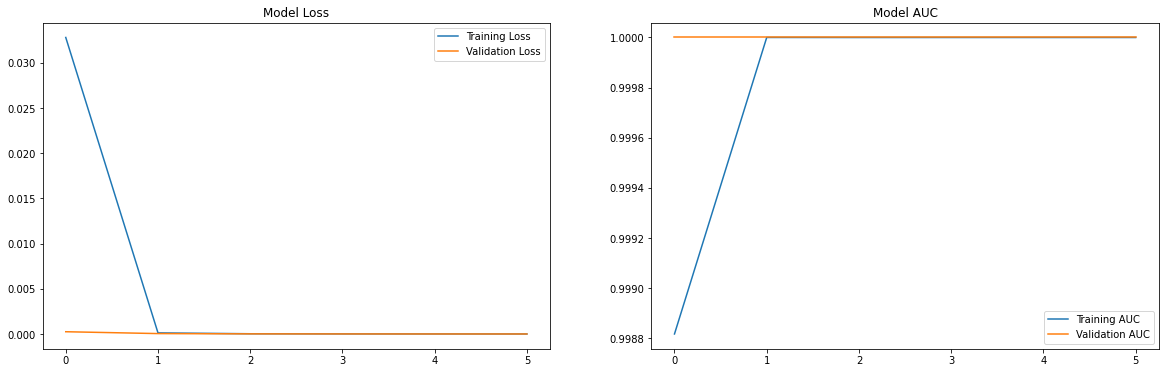

In [30]:
plt.figure(figsize=(20, 6))

train_loss, val_loss = history.history['loss'], history.history['val_loss']
train_auc, val_auc = history.history['auc'], history.history['val_auc']

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.legend()
plt.title("Model Loss")

plt.subplot(1, 2, 2)
plt.plot(history.history['auc'], label="Training AUC")
plt.plot(history.history['val_auc'], label="Validation AUC")
plt.legend()
plt.title("Model AUC")

plt.show()

# **Je model ta build korsi oitar Accuracy Score**

In [31]:
model.evaluate(X_test, y_test)

147/147 [==============================] - 0s 3ms/step - loss: 5.9764e-04 - auc: 1.0000


[0.0005976447137072682, 1.0]

In [32]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

147/147 [==============================] - 0s 1ms/step


# **Accuracy Of AdaBoost algorithm**

In [33]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

rahman = AdaBoostClassifier()

param_grid = {'n_estimators':[3]}

grid_abc = RandomizedSearchCV(rahman,param_grid,n_iter=10,scoring='accuracy',cv = 5,refit = True)
grid_abc.fit(X_train,y_train)
print("Best Score ==> ", grid_abc.best_score_)
print("Tuned Paramerers ==> ",grid_abc.best_params_)
print("Accuracy on Train set ==> ", grid_abc.score(X_train,y_train))
print("Accuracy on Test set ==> ", grid_abc.score(X_test,y_test))

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Score ==>  0.9999466097170316
Tuned Paramerers ==>  {'n_estimators': 3}
Accuracy on Train set ==>  0.999946606866357
Accuracy on Test set ==>  0.9995729233397395


In [34]:
from sklearn.metrics import classification_report

# Make predictions on the test set
y_pred = grid_abc.predict(X_test)

# Calculate and print the precision, recall, and F1-score
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       523
           1       1.00      1.00      1.00      4160

    accuracy                           1.00      4683
   macro avg       1.00      1.00      1.00      4683
weighted avg       1.00      1.00      1.00      4683



# **Accuracy of KNN algorithm cross validation score**

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X_test,y_test,cv=10)
    knn_scores.append(score.mean())

In [36]:
knn_classifier = KNeighborsClassifier(n_neighbors = 3)
score=cross_val_score(knn_classifier,X,y,cv=10)

In [37]:
score.mean()

0.9974369927381461

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_fscore_support

knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X_test,y_test,cv=10)
    knn_scores.append(score.mean())

# Use the KNN classifier with 3 neighbors to make predictions on the entire dataset
knn_classifier = KNeighborsClassifier(n_neighbors = 3)
knn_classifier.fit(X, y)
y_pred = knn_classifier.predict(X)

# Calculate and print the precision, recall, and F1-score
precision, recall, f1, _ = precision_recall_fscore_support(y, y_pred, average='micro')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Precision: 0.9999572868614386
Recall: 0.9999572868614386
F1-score: 0.9999572868614386


# **SUPPORT VECTOR MACHINE algorithm accuracy score**

In [39]:
from sklearn.svm import SVC
svm = SVC(random_state = 10)
svm.fit(X_train, y_train)
svm.predict(X_test)
svm.score(X_test,y_test)

1.0

In [56]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Create the SVM classifier
svm = SVC(random_state=10)

# Perform 10-fold cross validation on the SVM classifier
scores = cross_val_score(svm, X_train, y_train, cv=10)

# Print the mean and standard deviation of the cross validation scores
print("Mean score: ", np.mean(scores))

# Fit the classifier to the entire training set
svm.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm.predict(X_test)

# Print the accuracy score
print("Accuracy Score:", svm.score(X_test, y_test))


Mean score:  1.0
Accuracy Score: 0.9995729233397395


In [57]:
svm_pred = svm.predict(X_test)

# **Confusion Matrix of Support Vector Machine**

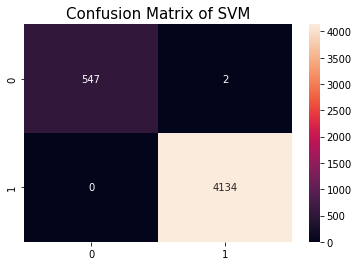

In [61]:
cf_matrix = confusion_matrix(y_test,svm_pred)
sns.heatmap(cf_matrix,annot=True,fmt="d")
plt.title('Confusion Matrix of SVM', fontsize = 15)
plt.show()

# **Precision Recall F1 score of SVM**

In [60]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.metrics import f1_score

f1_score(y_test, svm_pred, average='weighted') 
# Compute confusion matrix  
svm_matrix = confusion_matrix(y_test, svm_pred)
np.set_printoptions(precision=2)

print (classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       549
           1       1.00      1.00      1.00      4134

    accuracy                           1.00      4683
   macro avg       1.00      1.00      1.00      4683
weighted avg       1.00      1.00      1.00      4683



In [43]:
from sklearn.naive_bayes import GaussianNB

# Create the Naive Bayes classifier
nb = GaussianNB()

# Fit the classifier to the training data
nb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb.predict(X_train)

# Print the accuracy score
print("Accuracy Score:", nb.score(X_test, y_test))


Accuracy Score: 1.0


## **XGBoost**

In [65]:
from xgboost import XGBClassifier

# Create the XGBoost classifier
xgb = XGBClassifier(random_state=10)

# Fit the classifier to the training data
xgb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb.predict(X_train)

# Print the accuracy score
print("Accuracy Score:", xgb.score(X_test, y_test))


Accuracy Score: 1.0


## **Hybrid Model**

In [66]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# Create the SVM classifier
svm = SVC(random_state=10)

# Create the Naive Bayes classifier
nb = GaussianNB()

# Create the XGBoost classifier
xgb = XGBClassifier(random_state=10)

# Create the voting classifier
voting = VotingClassifier(estimators=[('svm', svm), ('nb', nb), ('xgb', xgb)], voting='hard')

# Fit the classifier to the training data
voting.fit(X_train, y_train)

# Make predictions on the test data
y_pred = voting.predict(X_test)

# Print the accuracy score
print("Accuracy Score:", voting.score(X_test, y_test))


Accuracy Score: 0.9997864616698697


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


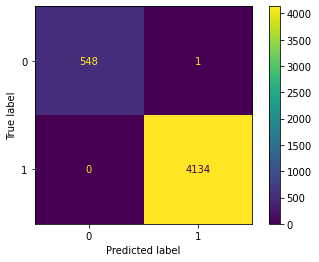

In [67]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(voting, X_test, y_test)


In [68]:
from sklearn.metrics import classification_report

# Generate the classification report
cr = classification_report(y_test, y_pred)

# Print the classification report
print(cr)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       549
           1       1.00      1.00      1.00      4134

    accuracy                           1.00      4683
   macro avg       1.00      1.00      1.00      4683
weighted avg       1.00      1.00      1.00      4683

